#CARS4U LIMITED PROJECT

In [67]:
#%pip install xgboost

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#algorithms 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance



#supress all warnings
import warnings
warnings.filterwarnings("ignore")


In [69]:
pd.set_option('display.max_columns', None)

In [70]:
df = pd.read_csv('used_cars_data.csv')

In [71]:
def analysis(dataname):
    
    print(dataname.columns)
    print(dataname.shape)
    print(dataname.info())
    print(dataname.isna().sum())
    print(dataname.sample(8))
    print(dataname.corr().T)
    #print(dataname)
    
    return dataname

In [72]:
dataname = df
analysis(df)

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')
(7253, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


- The missing values in price will be replaced with forward fill while missing values for Mileage,Power,Seats, and Engine will be replaced using backward fill.

In [73]:
#rename the column "Name" as "CarName"
df.rename(columns={"Name":"CarName"}, inplace=True)

In [74]:
df.CarName.unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Ford EcoSport 1.5 Petrol Ambiente',
       'Jeep Compass 1.4 Sport', 'Hyundai Elite i20 Magna Plus'],
      dtype=object)

In [75]:
#Splitting BrandName from CarName column
BrandName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"BrandName",BrandName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,S.No.,Location,BrandName,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Mumbai,Maruti,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Pune,Hyundai,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Chennai,Honda,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Chennai,Maruti,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Coimbatore,Audi,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [76]:
#Replace missing values using backward fill

def impute_nan_bfill(DataFrame,ColName):
     bfill=DataFrame[ColName].fillna(method = "bfill", inplace = True)
            
# replace nan values with the next value
     DataFrame[ColName + "_"] = DataFrame[ColName]
     DataFrame[ColName + "_"].fillna(method = "bfill", inplace = True)
#Call function to impute the next value in the column
for columns in ['Mileage','Power', 'Seats','Engine']:
    impute_nan_bfill(df, columns)
    
# Display imputed result
df[['Mileage', 'Mileage_','Power','Power_', 'Seats','Seats_', 'Engine','Engine_']].head(10)

#Drop actual columns
df = df.drop(['Mileage','Power', 'Seats','Engine'], axis = 1)
df.head()

,S.No.,Location,BrandName,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,New_Price,Price,Mileage_,Power_,Seats_,Engine_
0,0,Mumbai,Maruti,2010,72000,CNG,Manual,First,5.51,1.75,26.6 km/kg,58.16 bhp,5.0,998 CC
1,1,Pune,Hyundai,2015,41000,Diesel,Manual,First,16.06,12.50,19.67 kmpl,126.2 bhp,5.0,1582 CC
2,2,Chennai,Honda,2011,46000,Petrol,Manual,First,8.61,4.50,18.2 kmpl,88.7 bhp,5.0,1199 CC
3,3,Chennai,Maruti,2012,87000,Diesel,Manual,First,11.27,6.00,20.77 kmpl,88.76 bhp,7.0,1248 CC
4,4,Coimbatore,Audi,2013,40670,Diesel,Automatic,Second,53.14,17.74,15.2 kmpl,140.8 bhp,5.0,1968 CC


In [77]:
df.Price.fillna(method = "ffill", inplace = True)

In [78]:

#converting km/kg to kmpl 
def mileage_converter(column, data):
    New_Mileage = []                            
    for mileage in data[column]:                
        if str(mileage).endswith('km/kg'):      #accessing each km/kg in its column
            mileage = mileage[:-6]
            mileage = float(mileage)*0.18       #converting km/kg to kmpl with 0.18 factor
            New_Mileage.append(float(mileage))  #append it to New_Mileage list
        elif str(mileage).endswith('kmpl'):     #accessing each kmpl in its column
            mileage = mileage[:-6]
            New_Mileage.append(float(mileage))  #append it to New_Mileage list
        else:
            New_Mileage.append(np.nan)          #appending nan values to New_Mileage list
    data['New_Mileage'] = New_Mileage           #Making new column in dataframe

mileage_converter('Mileage_', df)
df.head()

,S.No.,Location,BrandName,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,New_Price,Price,Mileage_,Power_,Seats_,Engine_,New_Mileage
0,0,Mumbai,Maruti,2010,72000,CNG,Manual,First,5.51,1.75,26.6 km/kg,58.16 bhp,5.0,998 CC,4.788
1,1,Pune,Hyundai,2015,41000,Diesel,Manual,First,16.06,12.50,19.67 kmpl,126.2 bhp,5.0,1582 CC,19.600
2,2,Chennai,Honda,2011,46000,Petrol,Manual,First,8.61,4.50,18.2 kmpl,88.7 bhp,5.0,1199 CC,18.000
3,3,Chennai,Maruti,2012,87000,Diesel,Manual,First,11.27,6.00,20.77 kmpl,88.76 bhp,7.0,1248 CC,20.700
4,4,Coimbatore,Audi,2013,40670,Diesel,Automatic,Second,53.14,17.74,15.2 kmpl,140.8 bhp,5.0,1968 CC,15.000


In [79]:
df[['Mileage2','unitM']]=df['Mileage_'].str.split(expand=True)
df[['Power2','unitP']]=df['Power_'].str.split(expand=True)
df[['Engine2','unitE']]=df['Engine_'].str.split(expand=True)


In [80]:
df

,S.No.,Location,BrandName,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,New_Price,Price,Mileage_,Power_,Seats_,Engine_,New_Mileage,Mileage2,unitM,Power2,unitP,Engine2,unitE
0,0,Mumbai,Maruti,2010,72000,CNG,Manual,First,5.51,1.75,26.6 km/kg,58.16 bhp,5.0,998 CC,4.788,26.6,km/kg,58.16,bhp,998,CC
1,1,Pune,Hyundai,2015,41000,Diesel,Manual,First,16.06,12.50,19.67 kmpl,126.2 bhp,5.0,1582 CC,19.600,19.67,kmpl,126.2,bhp,1582,CC
2,2,Chennai,Honda,2011,46000,Petrol,Manual,First,8.61,4.50,18.2 kmpl,88.7 bhp,5.0,1199 CC,18.000,18.2,kmpl,88.7,bhp,1199,CC
3,3,Chennai,Maruti,2012,87000,Diesel,Manual,First,11.27,6.00,20.77 kmpl,88.76 bhp,7.0,1248 CC,20.700,20.77,kmpl,88.76,bhp,1248,CC
4,4,Coimbatore,Audi,2013,40670,Diesel,Automatic,Second,53.14,17.74,15.2 kmpl,140.8 bhp,5.0,1968 CC,15.000,15.2,kmpl,140.8,bhp,1968,CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Hyderabad,Volkswagen,2011,89411,Diesel,Manual,First,13.23,2.50,20.54 kmpl,103.6 bhp,5.0,1598 CC,20.500,20.54,kmpl,103.6,bhp,1598,CC
7249,7249,Mumbai,Volkswagen,2015,59000,Petrol,Automatic,First,10.15,2.50,17.21 kmpl,103.6 bhp,5.0,1197 CC,17.200,17.21,kmpl,103.6,bhp,1197,CC
7250,7250,Kolkata,Nissan,2012,28000,Diesel,Manual,First,9.47,2.50,23.08 kmpl,63.1 bhp,5.0,1461 CC,23.000,23.08,kmpl,63.1,bhp,1461,CC
7251,7251,Pune,Volkswagen,2013,52262,Petrol,Automatic,Third,10.15,2.50,17.2 kmpl,103.6 bhp,5.0,1197 CC,17.000,17.2,kmpl,103.6,bhp,1197,CC


- Next, we drop irrelevant columns.

In [81]:
df = df.drop(['S.No.','Mileage_','unitM','Power_','unitP','Engine_','unitE'], axis = 1)

In [82]:
#check for duplicate records 
duplicate = df[df.duplicated(keep="last")]
print("Duplicate Data", duplicate.shape)

Duplicate Data (3, 14)


- Three duplicate records found.

In [83]:
#Remove duplicate record
df=df.drop_duplicates()
df.shape

(7250, 14)

In [84]:
#Sanity check
df.sample(8)

,Location,BrandName,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,New_Price,Price,Seats_,New_Mileage,Mileage2,Power2,Engine2
6838,Jaipur,Maruti,2011,90000,Petrol,Manual,First,4.360,2.50,5.0,19.0,19.7,46.3,796
6032,Coimbatore,Maruti,2008,87628,Diesel,Manual,First,7.880,2.50,5.0,17.0,17.8,75,1248
3513,Chennai,Mahindra,2016,13500,Petrol,Manual,First,7.880,3.75,6.0,18.1,18.15,82,1198
2861,Coimbatore,Hyundai,2016,61578,Petrol,Manual,First,7.450,6.40,5.0,18.0,18.9,82,1197
1603,Jaipur,Volkswagen,2014,82621,Diesel,Manual,First,10.150,4.42,5.0,20.1,20.14,88.8,1498
4050,Kolkata,Toyota,2009,60000,Petrol,Manual,First,21.085,2.25,5.0,14.5,14.53,138,1798
2420,Pune,Toyota,2014,102000,Diesel,Automatic,Second,37.170,16.50,7.0,12.5,12.55,168.5,2982
1742,Hyderabad,Renault,2012,110224,Diesel,Manual,First,15.050,6.10,5.0,19.0,19.01,108.45,1461


In [85]:
df.isna().any()

Location             False
BrandName            False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
New_Price            False
Price                False
Seats_               False
New_Mileage          False
Mileage2             False
Power2               False
Engine2              False
dtype: bool

In [86]:
# Let us show frequency of categorical variables
cat_var = [
    "Location",
    "Fuel_Type",
    "Transmission",
    "Seats_",
    "Year",
    "BrandName",
    "Owner_Type",
    
]

for column in cat_var:
    print(df[column].value_counts())
    print("=" * 30)

Mumbai        948
Hyderabad     875
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       653
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
Diesel      3851
Petrol      3323
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
Manual       5201
Automatic    2049
Name: Transmission, dtype: int64
5.0     6090
7.0      801
8.0      170
4.0      121
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats_, dtype: int64
2015    929
2014    925
2016    886
2013    791
2017    708
2012    690
2011    579
2010    406
2018    361
2009    252
2008    207
2007    147
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: Year, dtype: int64
Maruti           1443
Hyundai          1340
Honda             741
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford        

In [87]:
#We shall use years of manufacture to derive age of cars
df['Current_year']=2022
df['Age_of_Car']=df['Current_year']-df['Year']
df.drop('Current_year',axis=1,inplace=True)
df.head()

,Location,BrandName,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,New_Price,Price,Seats_,New_Mileage,Mileage2,Power2,Engine2,Age_of_Car
0,Mumbai,Maruti,2010,72000,CNG,Manual,First,5.51,1.75,5.0,4.788,26.6,58.16,998,12
1,Pune,Hyundai,2015,41000,Diesel,Manual,First,16.06,12.50,5.0,19.600,19.67,126.2,1582,7
2,Chennai,Honda,2011,46000,Petrol,Manual,First,8.61,4.50,5.0,18.000,18.2,88.7,1199,11
3,Chennai,Maruti,2012,87000,Diesel,Manual,First,11.27,6.00,7.0,20.700,20.77,88.76,1248,10
4,Coimbatore,Audi,2013,40670,Diesel,Automatic,Second,53.14,17.74,5.0,15.000,15.2,140.8,1968,9


In [88]:
#Let us visualize the dataset to get more insight
def Countplot(data, var, color):
    sns.set(style="darkgrid")
    plt.figure(figsize=(15,8))
    varplot = sns.countplot(x= var,data=data, color = color)
    varplot.set(xlabel='var', ylabel='Count')
    for p in varplot.patches: 
        height = p.get_height() 
        varplot.text(p.get_x()+p.get_width()/2., 
          height + 3, 
          '{:1.2f}'.format((height/len(data))*100)+'%',  
          ha="center") 
    plt.title(f"Used Cars by: {var}")
    plt.xlabel(f"{var}")
    plt.ylabel("Count")

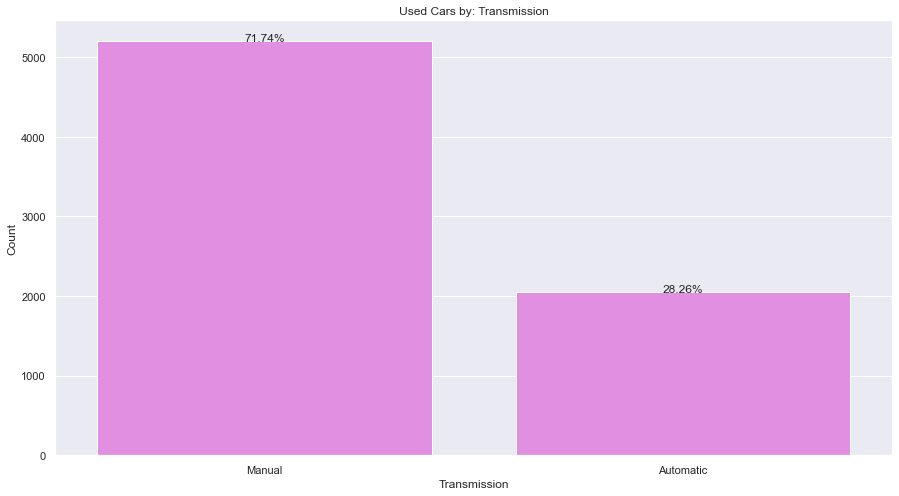

In [89]:
#Visualise the count of cars by transmission
Countplot(df, 'Transmission', color = "violet")

- Manual cars are almost 3 times the number of automatic cars.

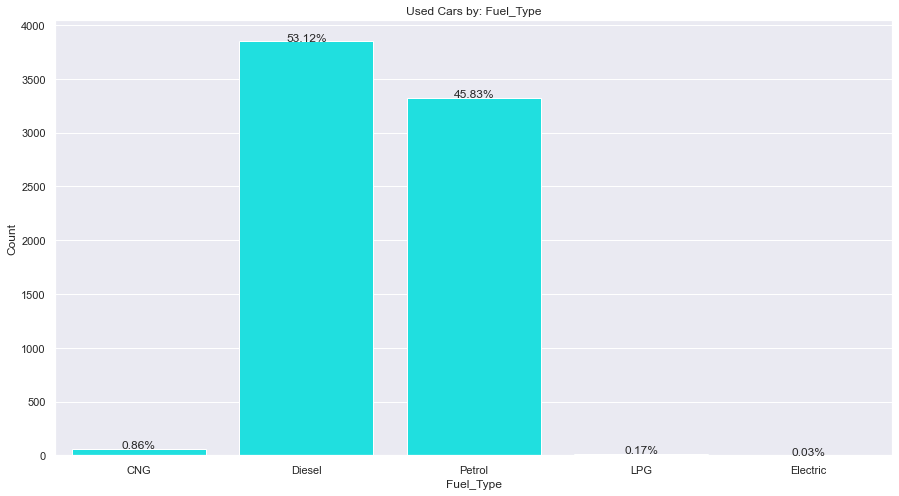

In [90]:
#Visualise the count of cars by transmission
Countplot(df, 'Fuel_Type', color = "cyan")

- Most of the cars are either diesel or petrol engine cars. However, compressed natural gas (CNG) vehicles are common in India hence the almost 1%.

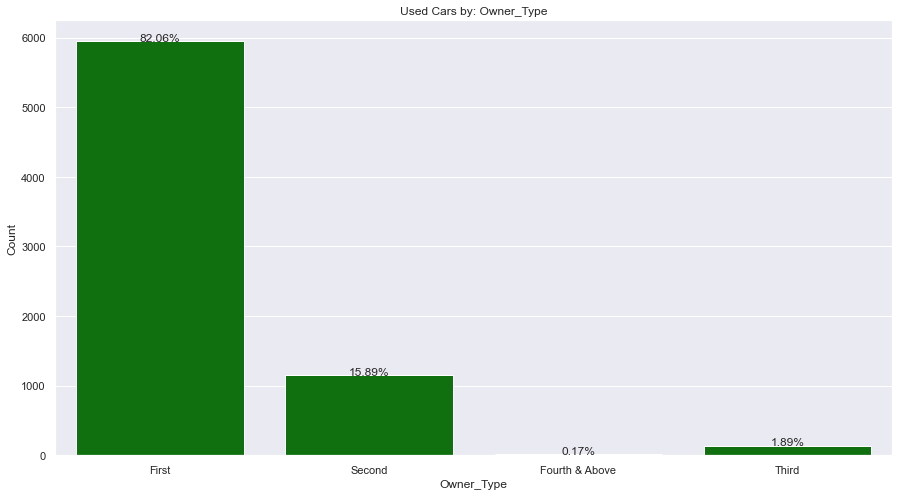

In [91]:
#Visualise the count of cars by owner type
Countplot(df, 'Owner_Type', color = "green")

- Most of the cars available have been used by 1 person only.

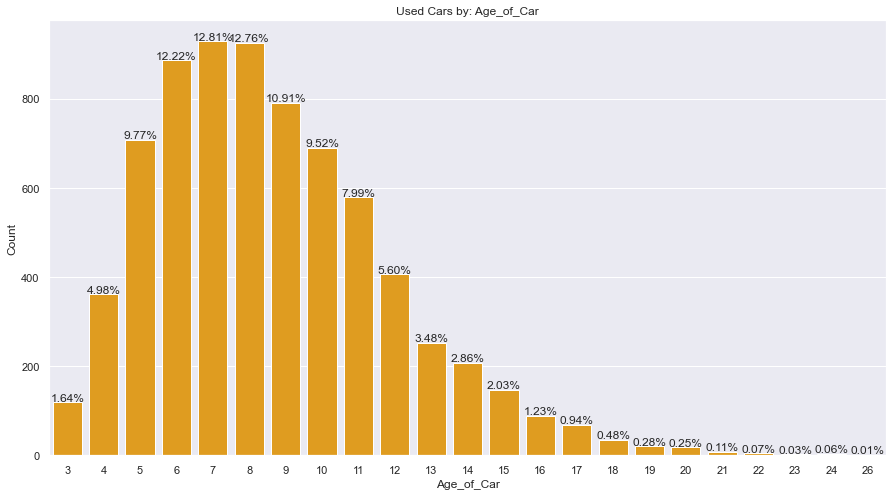

In [92]:
#Visualise the count of cars by Age of car
Countplot(df, 'Age_of_Car', color = "orange")

- Most cars above 600 units were produced between 5 to 10 years ago (2012 to 2017)

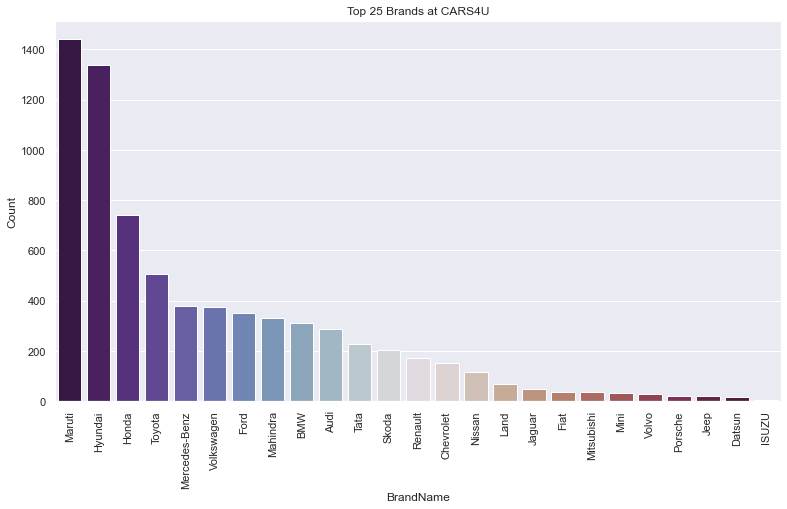

In [93]:
top25cars= df["BrandName"].value_counts()
fig,axs= plt.subplots(figsize=(13,7))
sns.countplot(x="BrandName",order= top25cars.index[:25],data= df,palette= 'twilight_shifted')
plt.ylabel('Count')
plt.xlabel('BrandName')
plt.xticks(rotation=90)
plt.title('Top 25 Brands at CARS4U')
plt.show()

- Based on vehicles in stock, we can infer that the top selling car brands are Maruti, Hyundai, Honda, and Toyota in descending order.

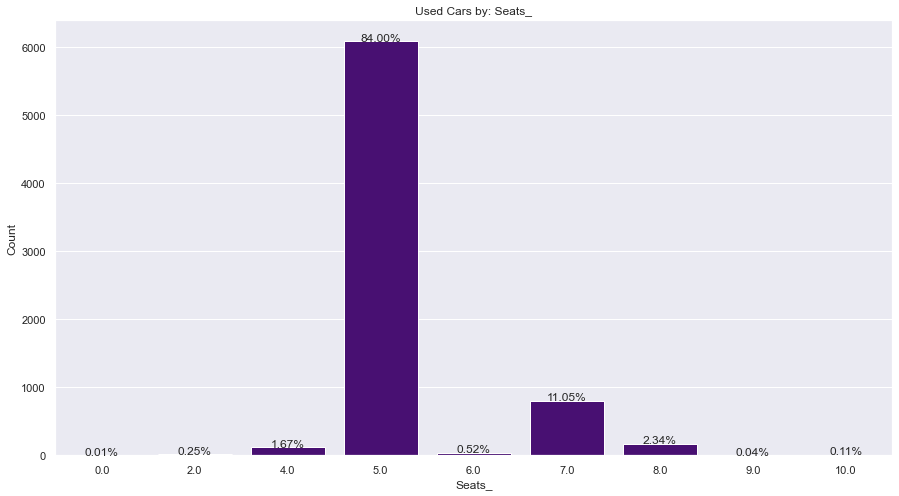

In [94]:
#Visualise the count of cars by engine
Countplot(df, 'Seats_', color = "indigo")

- Although there are about 11% of 7-seater cars, the cars with 5 seats are the most popular in the location.

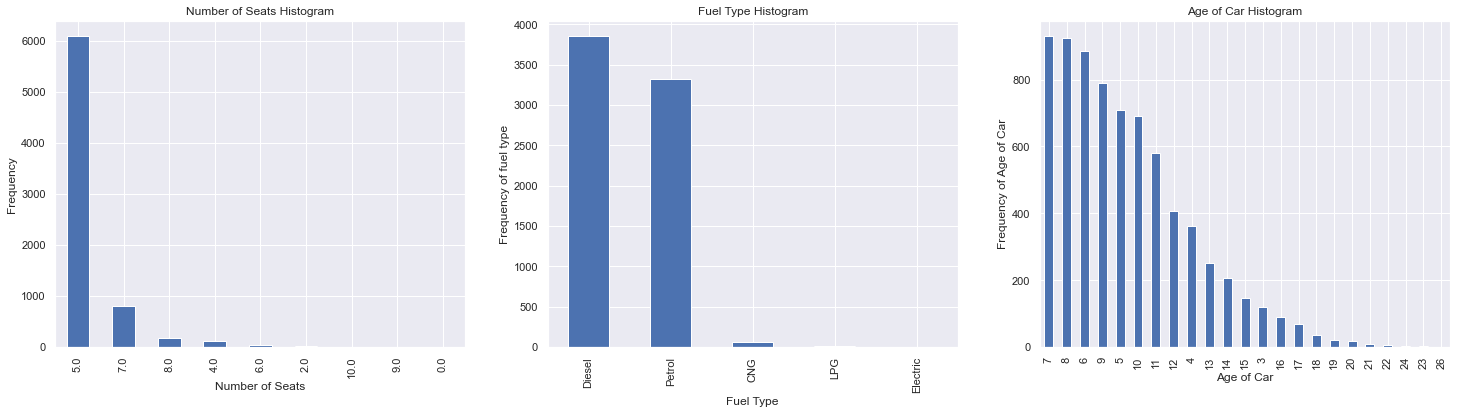

In [95]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.Seats_.value_counts().plot(kind='bar')
plt.title('Number of Seats Histogram')
plt1.set(xlabel = 'Number of Seats', ylabel='Frequency')

plt.subplot(1,3,2)
plt1 = df.Fuel_Type.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df.Age_of_Car.value_counts().plot(kind='bar')
plt.title('Age of Car Histogram')
plt1.set(xlabel = 'Age of Car', ylabel='Frequency of Age of Car')

plt.show()


In [96]:
#Let us view a summary of the dataset
df.describe(include="all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,7250,11,Mumbai,948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BrandName,7250,33,Maruti,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7250.0,NaN,NaN,NaN,2013.366207,3.253715,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7250.0,NaN,NaN,NaN,58707.187586,84443.411557,171.0,34000.0,53469.5,73000.0,6500000.0
Fuel_Type,7250,5,Diesel,3851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7250,2,Manual,5201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7250,4,First,5949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New_Price,7250.0,NaN,NaN,NaN,21.311791,24.260176,3.91,7.88,11.3,21.7125,375.0
Price,7250.0,NaN,NaN,NaN,8.294506,10.525211,0.44,2.5,4.65,8.4,160.0
Seats_,7250.0,NaN,NaN,NaN,5.278897,0.810681,0.0,5.0,5.0,5.0,10.0


- The maximum prices of used and new cars 160 and 375 respectively are a wide deviation from the mean values, this might point towards outliers.

- The kilometer_driven also shows a maximum of 6,500,000 compared to a mean of 58,699. The presence of outliers will be investigated.


- Similar to the countplot for Age of cars, most cars were manufactured between 2012 and 2017.

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7250 non-null   object 
 1   BrandName          7250 non-null   object 
 2   Year               7250 non-null   int64  
 3   Kilometers_Driven  7250 non-null   int64  
 4   Fuel_Type          7250 non-null   object 
 5   Transmission       7250 non-null   object 
 6   Owner_Type         7250 non-null   object 
 7   New_Price          7250 non-null   float64
 8   Price              7250 non-null   float64
 9   Seats_             7250 non-null   float64
 10  New_Mileage        7250 non-null   float64
 11  Mileage2           7250 non-null   object 
 12  Power2             7250 non-null   object 
 13  Engine2            7250 non-null   object 
 14  Age_of_Car         7250 non-null   int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 906.2+ KB


In [98]:
#change dtype for Mileage, engine and Power from object to float
df[["Mileage2","Power2", "Engine2"]] = df[["Mileage2","Power2", "Engine2"]].astype(float)

In [99]:
#Check Univariate and Multivariate analysis
# histogram and boxplot combined for the features
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="blue", linestyle="-")


# labeled_barplot
def labeled_barplot(data, feature, perc=False, n=None):
    
    #Barplot with percentage at the top   

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show() 


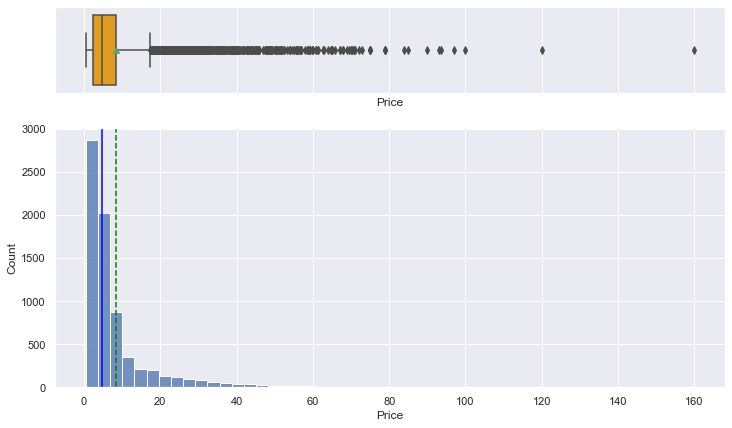

In [100]:
# histogram and boxplot for Price
histogram_boxplot(df, "Price", bins=50)

- The above plot shows a skew to the right, Mean is also greater than the median

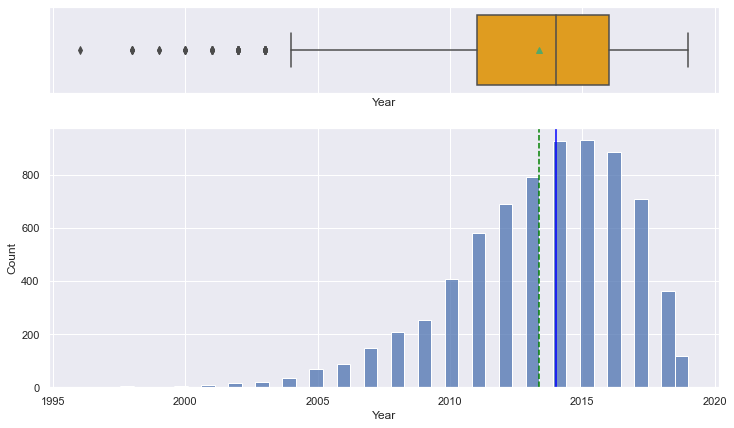

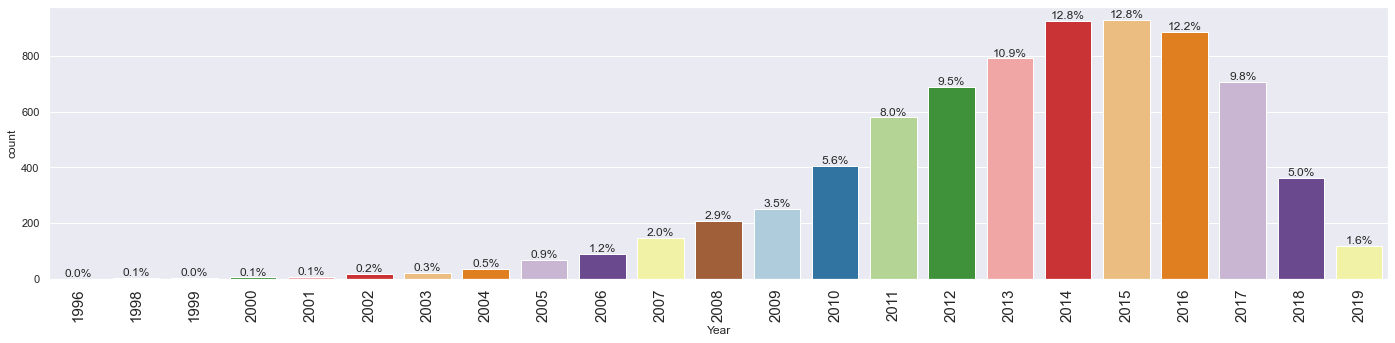

In [101]:
# histogram_boxplot and barplot for Year
histogram_boxplot(df, "Year")
labeled_barplot(df, "Year", perc=True)

- The above plot shows a skew to the left, Median is greater than the mean.
- The most available cars above 600 units were manufactured between 2012 and 2017.

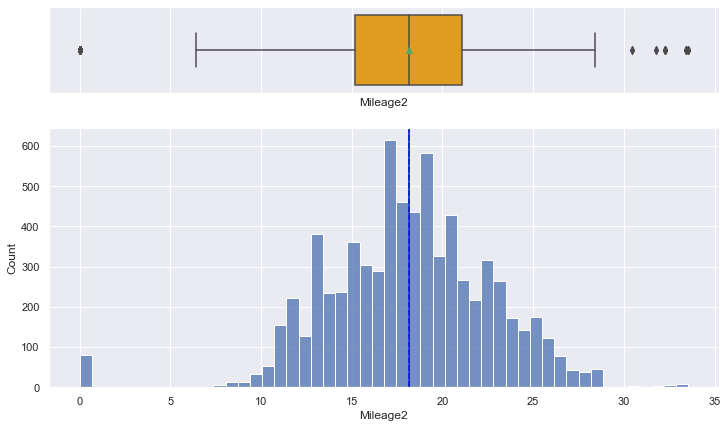

In [102]:
# histogram and boxplot for Mileage
histogram_boxplot(df, "Mileage2", bins=50)

- The mean and median appear to be almost equal. The distribution is uniform with items that look like outliers on either side. 

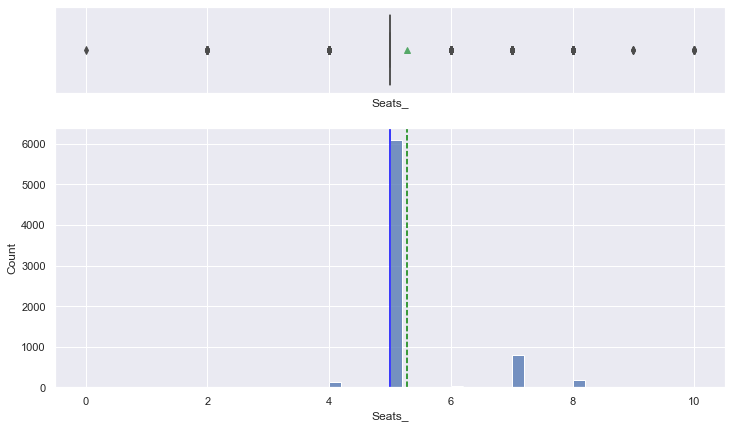

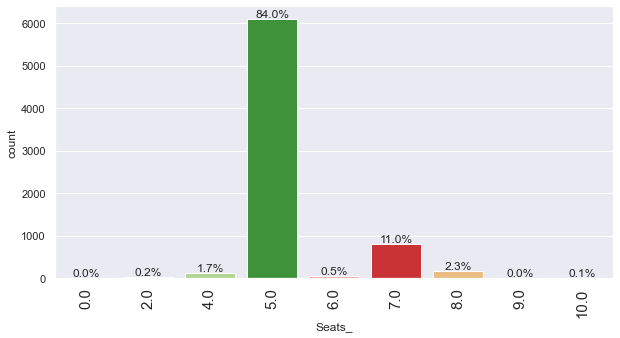

In [103]:
# barplot for Seats
histogram_boxplot(df, "Seats_", bins=50)
labeled_barplot(df, "Seats_", perc=True)

- The data shows skewness to the right. Most (84%) cars are 5-seaters.

#Bivariate Analysis

<Figure size 720x360 with 0 Axes>

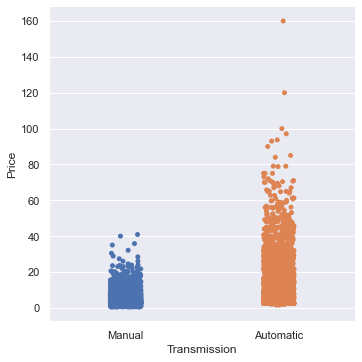

In [104]:
# catplot of price and Transmission
plt.figure(figsize=(10, 5))
sns.catplot(x="Transmission", y="Price", data=df)
plt.show();

- It is clear from the plot that automatic cars cost more than the manual transmission cars.

In [105]:
# jointplot of price and fuel type
def Jointplot(var1, var2, data, color):
    plt.figure(figsize=(10, 5))
    sns.jointplot(x=var1, y=var2, data=data, color=color)
    plt.title(f"Price of cars by: {var1} ")
    plt.xlabel(f"{var1}")
    plt.ylabel("Price of car")


<Figure size 720x360 with 0 Axes>

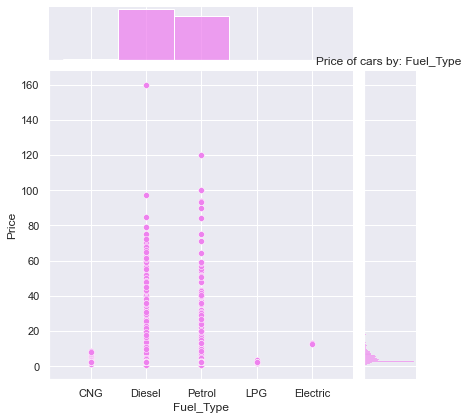

In [106]:
# jointplot of price and fuel type
Jointplot('Fuel_Type', 'Price',df, color ="violet");


- The prices of diesel and petrol cars appear similar, this may depend on brand. However, CNG, LPG and Electric cars are cheaper.

<Figure size 720x360 with 0 Axes>

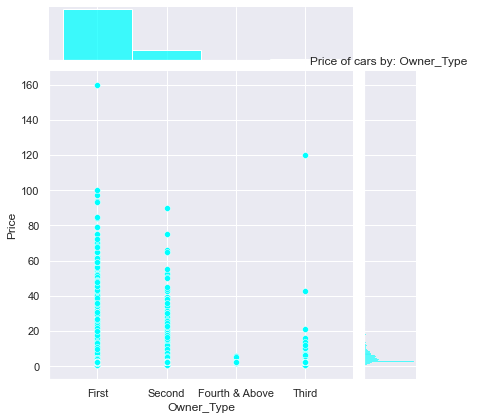

In [107]:
# jointplot of price and Owner type
Jointplot('Owner_Type', 'Price',df, color = "cyan");

- This plot shows a trend: The lesser the number of users, the higher the price of the car.

<Figure size 720x360 with 0 Axes>

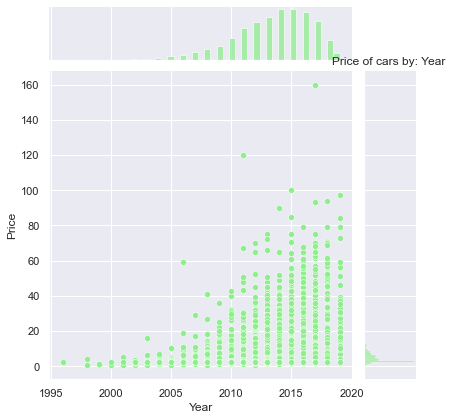

In [108]:
# jointplot of price and year
Jointplot('Year', 'Price',df, color ="lightgreen");

- We can infer from the above plot that the more recent the year of manufacture, the higher the price of the car.

#Multivariate Analysis

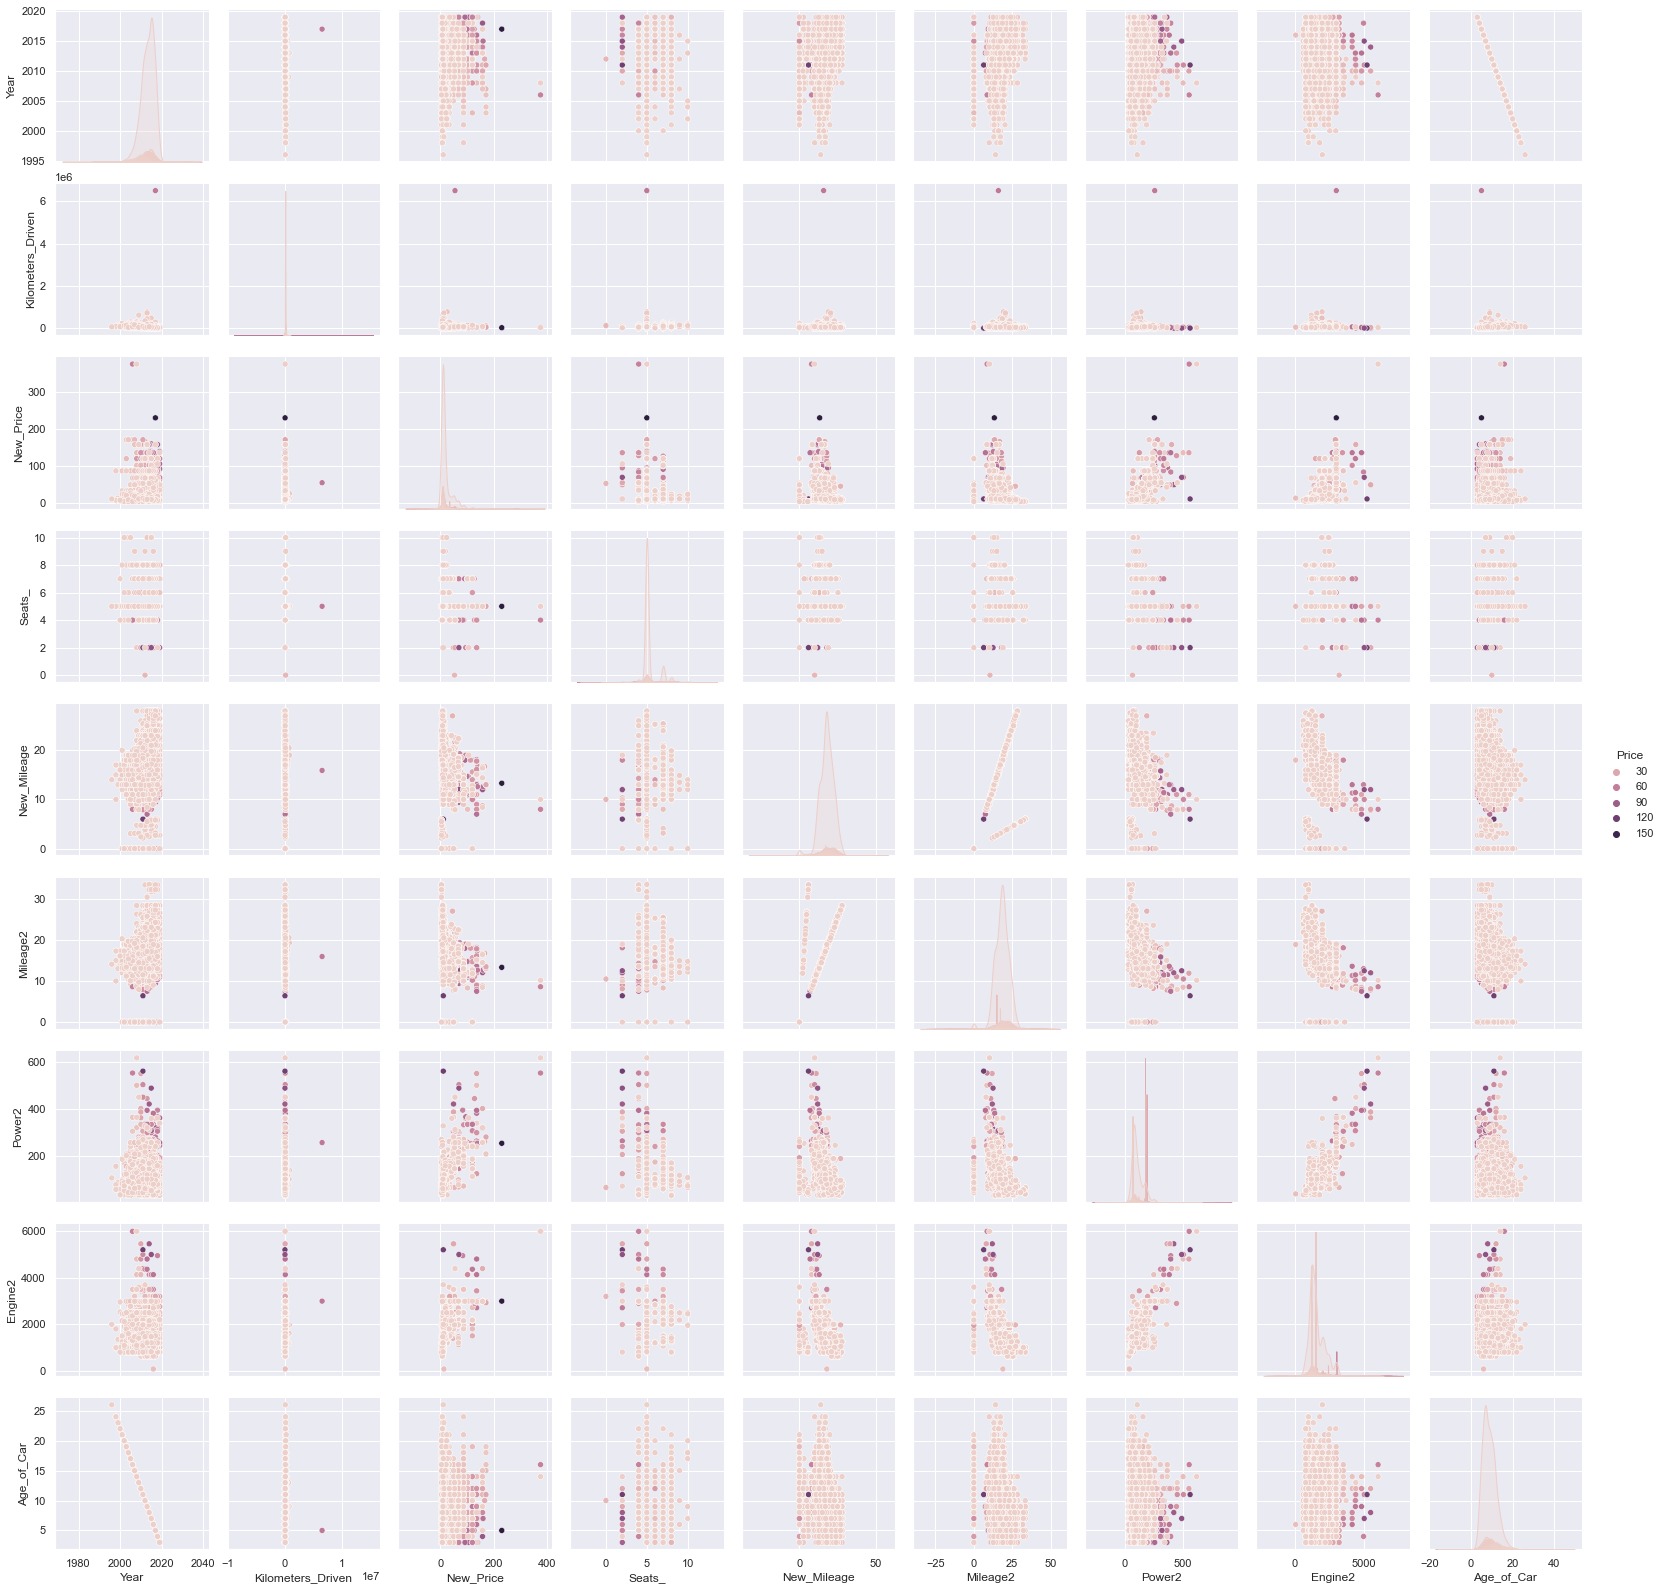

In [109]:
# pairplot of all variables with hue of Price
sns.pairplot(df, hue="Price")
plt.show()

- Power, Engine, Year of manufacture have significant effect on the price of the cars. The higher the power, engine and year of manufacture, the more the price.
- Cars with higher engine capacity seem to have more power.
- Newer cars with low mileage seem to command higher prices.

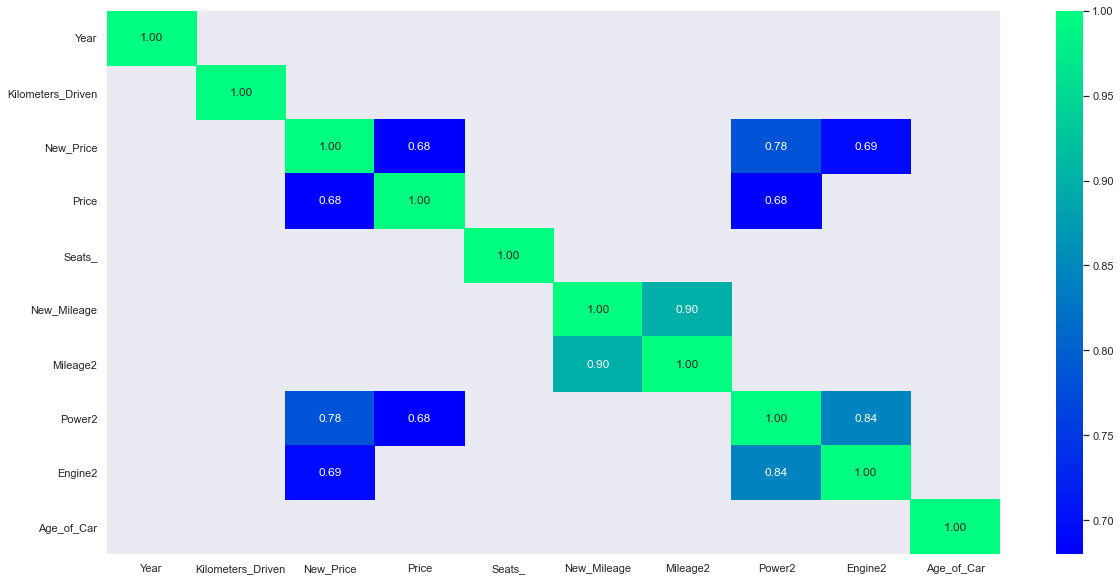

In [110]:
#Let us check correlation amongst variables set to minimum of 0.65
corr = df.corr()
corr_min_65 = corr[corr>=0.65]

#Correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_min_65, cmap='winter', annot=True, fmt=".2f");

- The power of the cars and engine capacity are highly correlated. Both also have strong correlation with the prices of the new and used cars.


#Outlier treatment (Kilometers_driven)

In [111]:
# Analysis for kilometers_driven
quartiles_kmdr = np.quantile(
    df["Kilometers_Driven"][df["Kilometers_Driven"].notnull()], [0.25, 0.75]
)
kmdr_4iqr = 4 * (quartiles_kmdr[1] - quartiles_kmdr[0])
print(f"Q1 = {quartiles_kmdr[0]}, Q3 = {quartiles_kmdr[1]}, 4*IQR = {kmdr_4iqr}")
outlier_kmdr = df.loc[
    np.abs(df["Kilometers_Driven"] - df["Kilometers_Driven"].median()) > kmdr_4iqr,
    "Kilometers_Driven",
]
outlier_kmdr

Q1 = 34000.0, Q3 = 73000.0, 4*IQR = 156000.0


29       262000
77       230000
181      216000
340      775000
358      620000
838      215000
1068     225000
1101     248000
1442     231673
1528     299322
1766     220000
1846     255000
1860     720000
1975     282000
2267     215750
2328    6500000
2346     234000
2823     480000
2988     240000
3092     480000
3649     300000
3713     232000
3894     250000
4491     445000
4719     250000
4792     242000
5647     227000
5800     210000
5834     250000
6919     290000
6921     350000
Name: Kilometers_Driven, dtype: int64

In [112]:
# Lets look at the identified outlier record 2328
df.loc[2328]

Location               Chennai
BrandName                  BMW
Year                      2017
Kilometers_Driven      6500000
Fuel_Type               Diesel
Transmission         Automatic
Owner_Type               First
New_Price                55.07
Price                     65.0
Seats_                     5.0
New_Mileage               15.9
Mileage2                 15.97
Power2                   258.0
Engine2                 2993.0
Age_of_Car                   5
Name: 2328, dtype: object

- For a 5-year old car which has only been used by first user and travelled 15.97 miles, it is obvious the kilometers driven is an incorrect entry.
- It is ideal to drop this record from the dataset.

In [113]:
# drop record 2328
df.drop(outlier_kmdr.index, axis=0, inplace=True)

In [114]:
df.sample(8)

,Location,BrandName,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,New_Price,Price,Seats_,New_Mileage,Mileage2,Power2,Engine2,Age_of_Car
4562,Chennai,Maruti,2016,61000,Petrol,Manual,First,4.360,2.90,5.0,24.0,24.70,47.3,796.0,6
1648,Coimbatore,Maruti,2013,60587,Petrol,Automatic,Second,7.880,3.49,5.0,16.9,16.98,66.1,998.0,9
5955,Pune,Mercedes-Benz,2013,79000,Diesel,Manual,Second,49.490,15.50,5.0,15.0,15.80,170.0,2148.0,9
1946,Coimbatore,Maruti,2014,83274,Diesel,Manual,First,7.880,5.79,5.0,22.0,22.90,74.0,1248.0,8
3957,Kochi,Renault,2016,53886,Petrol,Manual,First,4.780,3.07,5.0,25.1,25.17,53.3,799.0,6
1935,Ahmedabad,Mahindra,2016,98000,Diesel,Manual,First,18.865,11.50,7.0,15.0,15.40,120.0,1997.0,6
5308,Pune,Maruti,2013,74000,Petrol,Manual,First,7.670,4.50,5.0,22.0,22.00,81.8,1197.0,9
3215,Kolkata,Honda,2015,26000,Petrol,Manual,First,13.580,4.25,7.0,17.0,17.30,117.3,1497.0,7


In [115]:
df['BrandName'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

#Data Preprocessing

In [116]:
#Use Label Encoder to convert categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
def label_encode(DataFrame,ColName):
    df_sklearn = df
    lb_make = LabelEncoder()
    df_sklearn[ColName] = lb_make.fit_transform(DataFrame[ColName])
    
for columns in ["BrandName","Location","Fuel_Type","Transmission","Owner_Type"]:
    label_encode(df,columns)


df.head()

,Location,BrandName,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,New_Price,Price,Seats_,New_Mileage,Mileage2,Power2,Engine2,Age_of_Car
0,9,19,2010,72000,0,1,0,5.51,1.75,5.0,4.788,26.60,58.16,998.0,12
1,10,11,2015,41000,1,1,0,16.06,12.50,5.0,19.600,19.67,126.20,1582.0,7
2,2,10,2011,46000,4,1,0,8.61,4.50,5.0,18.000,18.20,88.70,1199.0,11
3,2,19,2012,87000,1,1,0,11.27,6.00,7.0,20.700,20.77,88.76,1248.0,10
4,3,1,2013,40670,1,0,2,53.14,17.74,5.0,15.000,15.20,140.80,1968.0,9


In [117]:
numerical= df.drop(['Price'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['Location', 'BrandName', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'New_Price', 'Seats_', 'New_Mileage',
       'Mileage2', 'Power2', 'Engine2', 'Age_of_Car'],
      dtype='object')


Categorical Columns: Index([], dtype='object')


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7219 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7219 non-null   int32  
 1   BrandName          7219 non-null   int32  
 2   Year               7219 non-null   int64  
 3   Kilometers_Driven  7219 non-null   int64  
 4   Fuel_Type          7219 non-null   int32  
 5   Transmission       7219 non-null   int32  
 6   Owner_Type         7219 non-null   int32  
 7   New_Price          7219 non-null   float64
 8   Price              7219 non-null   float64
 9   Seats_             7219 non-null   float64
 10  New_Mileage        7219 non-null   float64
 11  Mileage2           7219 non-null   float64
 12  Power2             7219 non-null   float64
 13  Engine2            7219 non-null   float64
 14  Age_of_Car         7219 non-null   int64  
dtypes: float64(7), int32(5), int64(3)
memory usage: 761.4 KB


In [119]:
X = features = df.drop(["Price"], axis=1)
y = target = df[["Price"]]

In [120]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

New_Price            3.288900
Power2               1.938323
Seats_               1.901898
Owner_Type           1.808096
Engine2              1.418329
Kilometers_Driven    1.073186
Age_of_Car           0.839413
Year                -0.839413
Transmission        -0.962135
dtype: float64

In [121]:
#Build model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [122]:
#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.reset_index()
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (5053, 14)
X_test: (2166, 14)
y_train: (5053, 1)
y_test: (2166, 1)


In [123]:
X_train.head(10)

,Location,BrandName,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,New_Price,Seats_,New_Mileage,Mileage2,Power2,Engine2,Age_of_Car
1232,9,11,2016,170000,1,1,0,8.23,5.0,24.0000,24.40,71.00,1120.0,6
144,3,30,2012,91235,1,1,0,37.17,7.0,11.0000,11.50,171.00,2982.0,10
1499,9,10,2007,80000,4,0,0,13.58,5.0,11.0000,11.10,142.00,2354.0,15
5182,8,7,2014,41000,1,1,0,11.30,7.0,17.0000,17.00,139.07,2149.0,8
3129,4,19,2014,74663,0,1,0,5.35,5.0,6.0372,33.54,67.04,998.0,8
2018,10,19,2016,50000,1,1,0,11.11,5.0,28.0000,28.09,88.50,1248.0,6
1202,8,19,2013,56840,4,1,0,4.36,5.0,22.7000,22.74,47.30,796.0,9
6962,5,30,2012,55500,1,0,0,37.17,7.0,11.0000,11.50,169.00,2982.0,10
1767,7,11,2016,28470,4,1,0,10.25,5.0,18.0000,18.60,81.83,1197.0,6
502,7,4,2012,32717,4,1,0,11.30,5.0,18.0000,18.60,79.40,1199.0,10


In [124]:
# apply linear regression model on the training set
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [125]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [126]:

# Checking model performance on train set
print("Training Performance:\n")
print(model_perf(linreg_model, X_train, y_train))

# Checking model performance on test set
print("\n\nTest Performance:\n")
print(model_perf(linreg_model, X_test, y_test))

Training Performance:

       RMSE       MAE       R^2  Adjusted R^2
0  6.679775  3.545416  0.588983       0.58784


Test Performance:

       RMSE       MAE       R^2  Adjusted R^2
0  6.600975  3.650612  0.623545      0.621094


- The Linear regression model is able to predict the price of a used car with R2  of 0.59 on the training set and test set of 0.62.
- MAE indicates that our current model is able to predict price within a mean error of 3.65 on the test set.

In [127]:
X= df.drop('Price', axis=1)
y= df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print (f'model : {model} and  RMSE score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {r2_score(y_test, y_pred)}')

model : LinearRegression() and  RMSE score is : 6.600975137779639, r2 score is 0.6235445940048581


#Ridge & Lasso & Elasticnet & KNN with Scaler and Transformer

In [128]:
rmse_test =[]
r2_test =[]
model_names =[]

numerical2= df.drop(['Price'], axis=1).select_dtypes('number').columns

X= df.drop('Price', axis=1)
y= df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

s = StandardScaler()
p= PowerTransformer(method='yeo-johnson', standardize=True)

rr = Ridge()
las = Lasso()
el= ElasticNet()
knn = KNeighborsRegressor()

models = [rr,las,el,knn]

for model in models:
    ct = make_column_transformer((s,numerical2),(p,skew_cols.index),remainder='passthrough')  
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  RMSE score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),2)}')

model_names = ['Ridge','Lasso','ElasticNet','KNeighbors']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : Ridge() and  RMSE score is : 6.42, r2 score is 0.64
model : Lasso() and  RMSE score is : 6.82, r2 score is 0.6
model : ElasticNet() and  RMSE score is : 6.99, r2 score is 0.58
model : KNeighborsRegressor() and  RMSE score is : 5.9, r2 score is 0.7


,RMSE,R2_Test
Ridge,6.42,0.64
Lasso,6.82,0.60
ElasticNet,6.99,0.58
KNeighbors,5.90,0.70


- KNeighbors yielded the highest R2 of 0.70 and the lowest RMSE 5.90; better test results than the base model.

#Tree Models

In [129]:
rmse_test =[]
r2_test =[]
model_names =[]



X= df.drop('Price', axis=1)
y= df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
et= ExtraTreesRegressor(random_state=42)

models = [rf,gb,xgb,et]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

model_names = ['RandomForest','GradientBoost','XBG','ExtraTree']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : RandomForestRegressor(random_state=42) and  rmse score is : 5.54, r2 score is 0.7348
model : GradientBoostingRegressor(random_state=42) and  rmse score is : 5.18, r2 score is 0.7684
model : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...) and  rmse score is : 5.57, r2 score is 0.7315
model : ExtraTreesRegressor(random_state=42) and  rmse score is : 

,RMSE,R2_Test
RandomForest,5.54,0.73
GradientBoost,5.18,0.77
XBG,5.57,0.73
ExtraTree,5.80,0.71


- Tree models are clearly better performers with GradientBoostRegressor yielding the highest R2 of 0.77 and the lowest RMSE 5.18.

#Hyperparameter tuning - RandomForestRegressor

In [130]:
X= df.drop('Price', axis=1)
y= df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators= 220, random_state=42 )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print (f' rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),4)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

 rmse score is : 5.5407, r2 score is 0.7348


- With hyperparameter tuning, the RandomForestRegressor improved only slightly but not enough to be better than the GradientBoostingRegressor.

#Feature Importance

Location : 0.025
BrandName : 0.011
Year : 0.076
Kilometers_Driven : 0.072
Fuel_Type : 0.002
Transmission : 0.002
Owner_Type : 0.003
New_Price : 0.504
Seats_ : 0.01
New_Mileage : 0.018
Mileage2 : 0.022
Power2 : 0.146
Engine2 : 0.029
Age_of_Car : 0.081



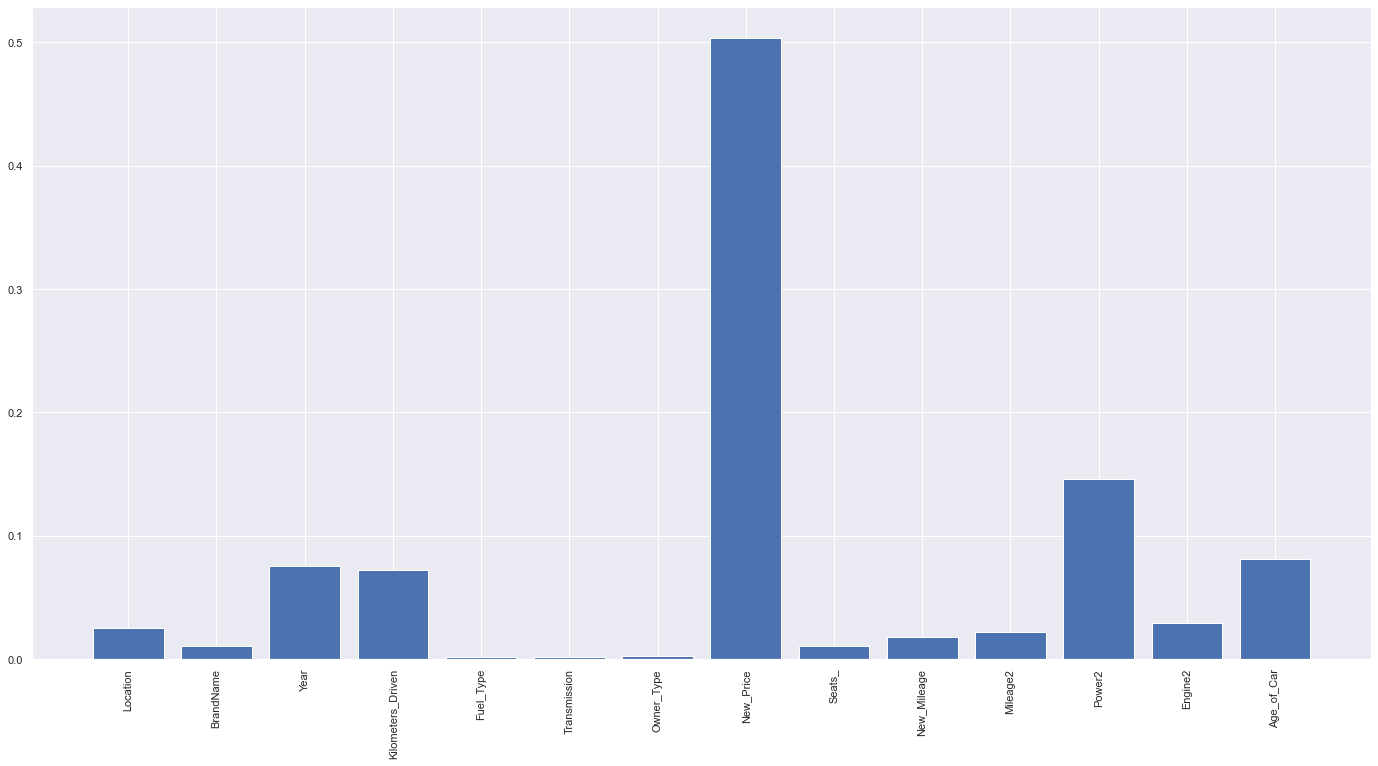

In [131]:
importances = rf.feature_importances_
feature_names = [f'feature {i}' for i in range(X.shape[1])]

# what are scores for the features
for i in range(len(rf.feature_importances_)):
    if rf.feature_importances_[i] >0.001:
        print(f'{X_train.columns[i]} : {round(rf.feature_importances_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(rf.feature_importances_))], rf.feature_importances_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.show()

- New_Price appears to be the biggest determinant of all the features. 
- New Price, Power, Age of car, Year and Kilometers driven have the highest importance scores.
- Therefore, these are the most important factors that affect the prices of used cars at CARS4U Ltd.